In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/NLP/

In [ ]:
#packages for file processing
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import string
import re
from sklearn.preprocessing import StandardScaler

In [ ]:
#getting training data and test data
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [ ]:
#getting list of features or variables
cols = []
for col in train_data.columns:
  cols.append(col)
for i in cols:
  print(i)

COMMENT_ID
AUTHOR
DATE
CONTENT
CLASS


In [ ]:
#get shape of the dataset
print("Shape of dataset is :" +str(train_data.shape))

Shape of dataset is :(1157, 5)


####We have 1157 rows of dataset each containing 5 columns 

###EDA

In [ ]:
#getting an overview of dataset
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [ ]:
train_data.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0
1156,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0


* Comment id - unique comment id of each comment
* author - author of each comment
* date - date of posting of the comment
* content - textual content of each comment
* class - class of each comment - AD / NOT AD

#####COMMENT_ID

In [ ]:
#COMMENT_ID
#checking if each of the comments are unique or some duplicates are present
print(train_data['COMMENT_ID'].is_unique)

False


In [ ]:
duplicate = train_data[train_data.duplicated()]
duplicate

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
854,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,janez novak,NaN,share and like this page to win a hand signed ...,1


In [ ]:
for i,id in enumerate(train_data['COMMENT_ID']):
  if id == 'LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s':
    print(train_data.iloc[i]) 

COMMENT_ID          LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s
AUTHOR                                              janez novak
DATE                                                        NaN
CONTENT       share and like this page to win a hand signed ...
CLASS                                                         1
Name: 853, dtype: object
COMMENT_ID          LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s
AUTHOR                                              janez novak
DATE                                                        NaN
CONTENT       share and like this page to win a hand signed ...
CLASS                                                         1
Name: 854, dtype: object


there is just one duplicate so we can leave it there just as is

In [ ]:
#checking for null values
train_data['COMMENT_ID'].isnull().sum()

0

###Author

In [ ]:
#checking for null values
train_data['AUTHOR'].isnull().sum()

0

In [ ]:
#getting total unique authors
print("Total unique authors present : ", train_data['AUTHOR'].nunique())

Total unique authors present :  1094


* there are many unique authors hence cannot use authors an categorial column
* we can remove the authors column as it does not seem very important in predicting labels

###Date

In [ ]:
#checkign null values  for dates
print("Total null values present in date are :",train_data['DATE'].isnull().sum())

Total null values present in date are : 138


* There are many null values in our date variable
* We cannot remove 138 instances from our dataset as it is already very small
* Just the date on which the comment was posted also does not imply whether a comment is advertisment or not to great extent
* In conclusin we are safe in removing the date column from our dataframe

###Content

In [ ]:
#checking for null values in the variable
print("Total null values present in content are :",train_data['CONTENT'].isnull().sum())

Total null values present in content are : 0


Analysis of comments

In [ ]:
texts = train_data['CONTENT']

In [ ]:
def length_of_comment(data,texts,length):
  count = 0
  label = 0
  for index , text in enumerate(texts):
    if len(text) >= length:
      count += 1
      label += data['CLASS'].iloc[index]
  print(f"Of all the comments {count} have length greater than or equal to {length}")
  print(f"Of {count} comments, the comments with length greater than {length} , {label} are advertisments")

In [ ]:
#checking for 1000+ comments
length_of_comment(train_data, texts, 1000)

Of all the comments 4 have length greater than or equal to 1000
Of 4 comments, the comments with length greater than 1000 , 4 are advertisments


In [ ]:
#checking for 500+ comments
length_of_comment(train_data, texts, 500)

Of all the comments 27 have length greater than or equal to 500
Of 27 comments, the comments with length greater than 500 , 24 are advertisments


In [ ]:
#presence of links   if 'http' in v or '.com' in v or 'www' in v:
def presence_of_links(data,texts):
  count = 0
  label = 0
  for index , text in enumerate(texts):
    if 'http' in text or '.com' in text or 'www' in text:
      count += 1
      label += data['CLASS'].iloc[index]
  print(f"Of all the comments {count} of them have some kind of hyperlinks")
  print(f"Of {count} comments with links, {label}  are advertisments")

In [ ]:
presence_of_links(train_data,texts)

Of all the comments 145 of them have some kind of hyperlinks
Of 145 comments with links, 134  are advertisments


In [ ]:
#presence of advertisment words like 'check out' , 'subscribe', 'chennel'
#presence of links   if 'http' in v or '.com' in v or 'www' in v:
def presence_of_channel(data,texts):
  count = 0
  label = 0
  for index , text in enumerate(texts):
    if 'channel' in text or 'CHANNEL' in text or 'SUBSCRIBE' in text or 'subscribe' in text or 'CHECK OUT' in text or 'check out' in text:
      count += 1
      label += data['CLASS'].iloc[index]
  print(f"Of all the comments {count} of them have some kind of channel advertisment")
  print(f"Of {count} comments with channel advertisment, {label}  are advertisments")

In [ ]:
presence_of_channel(train_data, texts)

Of all the comments 226 of them have some kind of channel advertisment
Of 226 comments with channel advertisment, 225  are advertisments


###Feature Engineering

Punctuation percentage

In [ ]:
#percentage presence of punctuation
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [ ]:
train_data['punct%'] = train_data['CONTENT'].apply(lambda x: count_punct(x))

In [ ]:
punctutaions = train_data['punct%']

In [ ]:
#checking the impact of punct%
def check_punctation_impact(threshold, data):
  count = 0
  label = 0
  for index , percent in enumerate(train_data['punct%']):
    if percent > threshold:
      count += 1
      label += data['CLASS'].iloc[index]
  print(f"Of all the comments {count} of them have some punctutations more than {threshold}")
  print(f"Of {count} comments with high punctution, {label}  are  advertisments")

In [ ]:
check_punctation_impact(50,train_data)

Of all the comments 10 of them have some punctutations more than 50
Of 10 comments with high punctution, 1  are  advertisments


In [ ]:
check_punctation_impact(30,train_data)

Of all the comments 24 of them have some punctutations more than 30
Of 24 comments with high punctution, 4  are  advertisments


In [ ]:
check_punctation_impact(20,train_data)

Of all the comments 82 of them have some punctutations more than 20
Of 82 comments with high punctution, 25  are  advertisments


Hyperlinks

In [ ]:
#adding precence of link feature
linked = []
for index , text in enumerate(train_data['CONTENT']):
    if 'http' in text or '.com' in text or 'www' in text:
        linked.append(1)
    else:
        linked.append(0)

In [ ]:
train_data['link'] = linked

Channel advertisement


In [ ]:
#adding advertisement of own channel feature
channel_plug = []
for index , text in enumerate(texts):
  if 'channel' in text or 'CHANNEL' in text or 'SUBSCRIBE' in text or 'subscribe' in text or 'CHECK OUT' in text or 'check out' in text:
    channel_plug.append(1)
  else:
    channel_plug.append(0)

In [ ]:
train_data['channel_plug'] = channel_plug

In [ ]:
train_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,punct%,link,channel_plug
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,8.2,0,1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,7.9,0,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,9.1,0,0
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1,0.0,0,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1,3.7,0,1


Now that we have removed punctuations and hyperlinks we can remove them

In [ ]:
#dropping unnecessary columns
drop_list = ['COMMENT_ID','AUTHOR','DATE']
def drop_columns(columns,data):
  data.drop(drop_list,axis=1,inplace=True)

In [ ]:
drop_columns(drop_list,train_data)

Body length

In [ ]:
#creating a feature body length
train_data['body_len'] = train_data['CONTENT'].apply(lambda x: len(x) - x.count(" "))

In [ ]:
#taking look at the modified data
train_data.head()

,CONTENT,CLASS,punct%,link,channel_plug,body_len
0,"Huh, anyway check out this you[tube] channel: ...",1,8.2,0,1,49
1,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,7.9,0,1,38
2,watch?v=vtaRGgvGtWQ Check this out .﻿,1,9.1,0,0,33
3,Subscribe to my channel ﻿,1,0.0,0,1,21
4,and u should.d check my channel and tell me wh...,1,3.7,0,1,54


Correlation

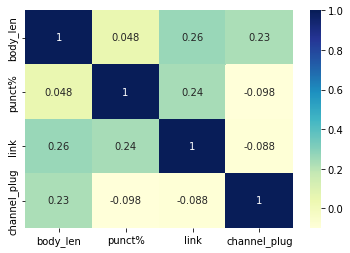

In [ ]:
corr_df = train_data[['body_len', 'punct%', 'link' , 'channel_plug']]
sns.heatmap(corr_df.corr(), cmap="YlGnBu", annot=True)

Non of the numerical variables have a very high correlation, hence multicollinearity does not arise

###Data Preprocessing

In [ ]:
#checking if the numeric variable are highly dispersed
train_data[['body_len','punct%']].describe()

,body_len,punct%
count,1157.000000,1157.000000
mean,79.047537,7.646413
std,108.153783,9.806812
min,2.000000,0.000000
25%,25.000000,1.200000
50%,40.000000,4.800000
75%,81.000000,10.500000
max,1170.000000,100.000000


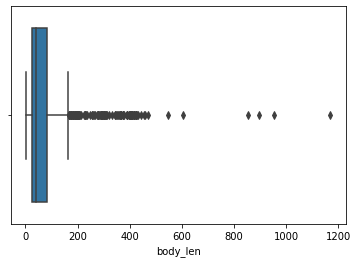

In [ ]:
#looking at the data dispersion
sns.boxplot(x=train_data['body_len'])

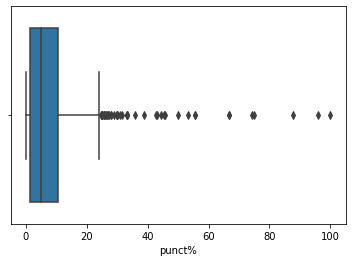

Although most of the models we  use are not affected by the variable magnitudes , but models like neural networks are effected so we can stardize the dataset

In [ ]:
scaler = StandardScaler()
train_data[['body_len', 'punct%']] = scaler.fit_transform(train_data[['body_len', 'punct%']])

#Text cleaning and tokenization

In [ ]:
#importing neccesary  models for text processing
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#cleaning the texts i.e. tokenizing and stemming
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [ ]:
#although we made a function here we feed this clean function when we pass it to the vectorizer

In [ ]:
#importing sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer 

In [ ]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(train_data[['CONTENT', 'body_len', 'punct%','link', 'channel_plug']], train_data['CLASS'], test_size=0.1)

In [ ]:
#verifying the shapesof the splits
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (1041, 5)
X_test.shape: (116, 5)
y_train.shape: (1041,)
y_test.shape: (116,)


###Vectorization

In [ ]:
#vectorization using tf-idf
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['CONTENT'])

tfidf_train = tfidf_vect_fit.transform(X_train['CONTENT'])
tfidf_test = tfidf_vect_fit.transform(X_test['CONTENT'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%','link', 'channel_plug']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%','link', 'channel_plug']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,link,channel_plug,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535
0,0.656317,1.260239,1,0,0.060003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.370265,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.259442,-0.576013,0,0,0.140821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.416694,0.117682,0,1,0.125679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.129062,0.097279,0,0,0.060255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.441585,1.178628,0,0,0.020113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055879,0.0,0.295152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Model selection and training
We have a few candidates for model selection
* Naive Bayes
* SVM-SVC
* Random Forest
* Neural Networks

Metrics we need to look out for
* Accuracy
* Recall
* Type I error
* ROC_AUC score

In [ ]:
def metrics(y_test,y_pred):
  precision, recall, fscore, train_support = score(y_test, y_pred, pos_label=1, average='binary')
  print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))
  print('\nROC_AUC score: {}'.format(round(roc_auc_score(y_test,y_pred),3)))
  conf = confusion_matrix(y_test,y_pred)
  print(conf)
  print(f"Type 1 error is {conf[0][1]}")

Naive Bayes

In [ ]:
#implementing gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
g_nb = GaussianNB()
gnb_model = g_nb.fit(X_train_vect, y_train)
y_pred = gnb_model.predict(X_test_vect)

metrics(y_test,y_pred)

Precision: 0.83 / Recall: 0.65 / Accuracy: 0.75

ROC_AUC score: 0.754
[[48  8]
 [21 39]]
Type 1 error is 8


SVM-SVC

In [ ]:
#trying out SVM
from sklearn.svm import SVC
svm_cv = SVC(gamma='auto')
svm_model = svm_cv.fit(X_train_vect, y_train)
y_pred = svm_model.predict(X_test_vect)

metrics(y_test,y_pred)

Precision: 0.784 / Recall: 0.667 / Accuracy: 0.733

ROC_AUC score: 0.735
[[45 11]
 [20 40]]
Type 1 error is 11


Random forest with grid search cv

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
import time

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param,scoring='accuracy'cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.347537,0.015737,0.038691,0.001628,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.952153,0.951923,0.951923,0.947115,0.956731,0.951969,0.003042,1
5,2.590902,0.026949,0.068237,0.001602,60,300,"{'max_depth': 60, 'n_estimators': 300}",0.956938,0.947115,0.947115,0.947115,0.956731,0.951003,0.004762,2
8,2.687131,0.036073,0.069289,0.001036,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.947368,0.947115,0.951923,0.951923,0.951923,0.950051,0.002295,3
11,2.477546,0.366955,0.064932,0.011461,None,300,"{'max_depth': None, 'n_estimators': 300}",0.937799,0.947115,0.947115,0.956731,0.956731,0.949098,0.007100,4
2,2.140377,0.028090,0.063019,0.002803,30,300,"{'max_depth': 30, 'n_estimators': 300}",0.956938,0.947115,0.956731,0.942308,0.942308,0.949080,0.006571,5


{'max_depth': 90, 'n_estimators': 150}	with mean accuracy 0.95 for all cross validation split

In [ ]:
y_pred = gs.predict(X_test_vect)
metrics(y_test,y_pred)

Precision: 0.964 / Recall: 0.9 / Accuracy: 0.931

ROC_AUC score: 0.932
[[54  2]
 [ 6 54]]
Type 1 error is 2


Count vectorizer also gives good resutls

In [ ]:
#vectorization using countvectorier
count_vect = CountVectorizer(analyzer=clean_text)
count_vect_fit = count_vect.fit(X_train['CONTENT'])

count_train = count_vect_fit.transform(X_train['CONTENT'])
count_test = count_vect_fit.transform(X_test['CONTENT'])

X_train_count_vect = pd.concat([X_train[['body_len', 'punct%','link', 'channel_plug']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_count_vect = pd.concat([X_test[['body_len', 'punct%','link', 'channel_plug']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)
           

X_train_count_vect.head()

,body_len,punct%,link,channel_plug,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535
0,0.656317,1.260239,1,0,0.060003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.370265,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.259442,-0.576013,0,0,0.140821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.416694,0.117682,0,1,0.125679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.129062,0.097279,0,0,0.060255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.441585,1.178628,0,0,0.020113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.055879,0.0,0.295152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param,scoring='accuracy', cv=5, n_jobs=-1)
gs_fit = gs.fit(X_train_count_vect, y_train)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,1.358798,0.018865,0.040357,0.002439,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.956938,0.951923,0.947115,0.956731,0.951923,0.952926,0.003643,1
11,2.464148,0.364614,0.063605,0.010603,None,300,"{'max_depth': None, 'n_estimators': 300}",0.956938,0.947115,0.956731,0.951923,0.951923,0.952926,0.003643,1
1,1.089017,0.016414,0.038155,0.005333,30,150,"{'max_depth': 30, 'n_estimators': 150}",0.947368,0.951923,0.956731,0.937500,0.951923,0.949089,0.006507,3
4,1.316170,0.014691,0.038841,0.002173,60,150,"{'max_depth': 60, 'n_estimators': 150}",0.947368,0.947115,0.951923,0.947115,0.951923,0.949089,0.002316,3
10,1.351812,0.015188,0.039454,0.001991,None,150,"{'max_depth': None, 'n_estimators': 150}",0.947368,0.951923,0.947115,0.947115,0.951923,0.949089,0.002316,3


{'max_depth': 90, 'n_estimators': 150}	with mean accuracy 0.95 for all cross validation split

In [ ]:
y_pred = gs.predict(X_test_vect)
metrics(y_test,y_pred)

Precision: 0.947 / Recall: 0.9 / Accuracy: 0.922

ROC_AUC score: 0.923
[[53  3]
 [ 6 54]]
Type 1 error is 3


Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
lreg_model = log_reg.fit(X_train_vect,y_train)
y_pred = lreg_model.predict(X_test_vect)

In [ ]:
metrics(y_test,y_pred)

Precision: 1.0 / Recall: 0.8 / Accuracy: 0.897

ROC_AUC score: 0.9
[[56  0]
 [12 48]]
Type 1 error is 0


Considering all model used we can and the metrics of the model we can conclude that random forest gives the best reults

In [ ]:
#making submission
test_data.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [ ]:
test_data['punct%'] = test_data['CONTENT'].apply(lambda x: count_punct(x))

In [ ]:

#adding precence of link feature
linked = []
for index , text in enumerate(test_data['CONTENT']):
    if 'http' in text or '.com' in text or 'www' in text:
        linked.append(1)
    else:
        linked.append(0)

test_data['link'] = linked


In [ ]:

#adding advertisement of own channel feature
channel_plug = []
for index , text in enumerate(test_data['CONTENT']):
  if 'channel' in text or 'CHANNEL' in text or 'SUBSCRIBE' in text or 'subscribe' in text or 'CHECK OUT' in text or 'check out' in text:
    channel_plug.append(1)
  else:
    channel_plug.append(0)

test_data['channel_plug'] = channel_plug


In [ ]:
drop_columns(drop_list,test_data)

In [ ]:

test_data['body_len'] = test_data['CONTENT'].apply(lambda x: len(x) - x.count(" "))
test_data[['body_len', 'punct%']] = scaler.fit_transform(test_data[['body_len', 'punct%']])


In [ ]:
tfidf_ftest = tfidf_vect_fit.transform(test_data['CONTENT'])

In [ ]:
x_test_vect = pd.concat([test_data[['body_len', 'punct%','link', 'channel_plug']].reset_index(drop=True), 
           pd.DataFrame(tfidf_ftest.toarray())], axis=1)

In [ ]:
x_test_vect.head()

,body_len,punct%,link,channel_plug,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,...,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2531,2532,2533,2534,2535
0,0.512704,-0.038995,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.456927,-0.372787,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.121286,0.037300,0,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.186549,-0.201123,0,0,0.079350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.373017,-0.201123,0,1,0.153757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test_pred = gs.predict(x_test_vect)

In [ ]:
tested = pd.read_csv('./test.csv')

In [ ]:
index = tested['ID'].tolist()

In [ ]:
pred_list = y_test_pred.tolist()

In [ ]:
submission_nodl2 = pd.DataFrame(list(zip(index, pred_list)),
               columns =['ID', 'CLASS'])

In [ ]:
submission_nodl2.head()

,ID,CLASS
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1


In [ ]:
submission_nodl2.to_csv('./file_submission.csv', index=False)